# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
import os
os.environ['PROJ_LIB'] = '$CONDA_PREFIX/share/proj'

In [52]:
from mpl_toolkits.basemap import Basemap

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [54]:
data_file = "output_data/cities.csv"

In [55]:
clean_city_data = pd.read_csv(data_file)

clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   561 non-null    int64  
 1   City         561 non-null    object 
 2   Latitude     561 non-null    float64
 3   Longitude    561 non-null    float64
 4   Max Temp     561 non-null    float64
 5   Wind Speed   561 non-null    float64
 6   Cloudiness   561 non-null    float64
 7   Description  561 non-null    object 
 8   Humidity     561 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 39.6+ KB


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [26]:
#configure gmaps
#gmaps.configure(api_key = g_key)

In [27]:
#store 'lat' and 'lng' into locations
locations = clean_city_data[["Latitude","Longitude"]].astype(float)

humidity = clean_city_data['Humidity'].astype(float)

In [28]:
locations

,Latitude,Longitude
0,-53.1500,-70.9167
1,-23.1203,-134.9692
2,11.2833,-15.8333
3,7.5264,-12.5050
4,-33.9258,18.4232
...,...,...
556,24.1447,67.4497
557,35.4050,116.5814
558,63.6559,9.5683
559,53.7841,82.3116


In [29]:
humidity

0       71.0
1       78.0
2       77.0
3       91.0
4      100.0
       ...  
556     71.0
557     34.0
558     87.0
559     35.0
560     74.0
Name: Humidity, Length: 561, dtype: float64

In [30]:
#use Humidity as the weight
#create a heatwave layer to map

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,
                                weights = humidity,
                                max_intensity = 100,
                                dissipating = False,
                                point_radius = 1)
fig.add_layer(heat_layer)

fig

NameError: name 'gmaps' is not defined

In [31]:
import seaborn as sns

In [32]:
cleaned_data_plotting = clean_city_data.pivot("Latitude", "Longitude", "Humidity")

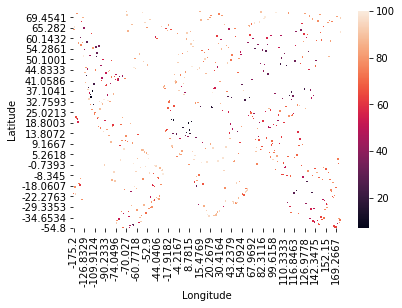

In [34]:
ax = sns.heatmap(cleaned_data_plotting)
ax.invert_yaxis()

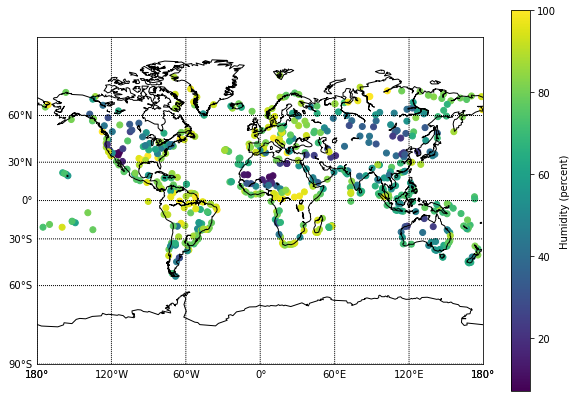

In [56]:
plt.subplots(figsize=(10, 7))
map = Basemap(projection='mill',lon_0=0)


map.drawcoastlines()

#draw parallels = latitude, long
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

map.scatter(clean_city_data['Longitude'], clean_city_data['Latitude'], latlon=True, 
            c=clean_city_data['Humidity'])

plt.colorbar(label=r'Humidity (percent)')

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [35]:
min_temp = 70
min_temp_Kelvin = ((min_temp -32.0)*5.0/9.0+273.15)

#drop any rows with null values
clean_city_data = clean_city_data[clean_city_data['Max Temp']>min_temp_Kelvin]

In [36]:
max_temp = 80
max_temp_Kelvin = ((max_temp -32.0)*5.0/9.0+273.15)

#drop any rows with null values
clean_city_data = clean_city_data[clean_city_data['Max Temp']<max_temp_Kelvin]

In [37]:
windspeed = 10

clean_city_data = clean_city_data[clean_city_data['Wind Speed']<windspeed]

In [38]:
cloudiness = 0

clean_city_data = clean_city_data[clean_city_data['Cloudiness']==cloudiness]

In [39]:
clean_city_data

,Unnamed: 0,City,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
43,43,saint-philippe,-21.3585,55.7679,297.15,3.09,0.0,clear sky,68.0
89,89,adrar,20.5022,-10.0711,299.51,5.18,0.0,clear sky,11.0
98,98,chardara,41.2547,67.9692,295.61,3.29,0.0,clear sky,40.0
115,115,pahrump,36.2083,-115.9839,296.48,1.87,0.0,clear sky,14.0
197,197,seoul,37.5683,126.9778,298.15,3.09,0.0,clear sky,23.0
208,208,touros,-5.1989,-35.4608,296.15,2.06,0.0,clear sky,94.0
263,263,hun,29.1268,15.9477,298.81,3.00,0.0,clear sky,26.0
269,269,saint-joseph,-21.3667,55.6167,296.15,3.09,0.0,clear sky,68.0
302,302,le port,-20.9373,55.2919,297.15,4.12,0.0,clear sky,73.0
311,311,bull savanna,17.8868,-77.5902,297.34,5.43,0.0,clear sky,81.0


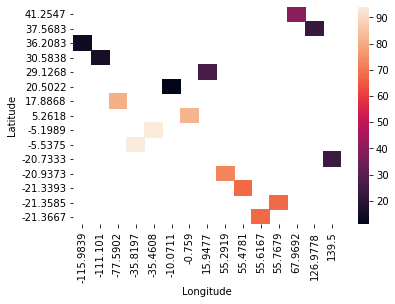

In [40]:
cleaned_data_plotting = clean_city_data.pivot("Latitude", "Longitude", "Humidity")
ax = sns.heatmap(cleaned_data_plotting)
ax.invert_yaxis()

In [44]:
import os
os.environ['PROJ_LIB'] = '$CONDA_PREFIX/share/proj'

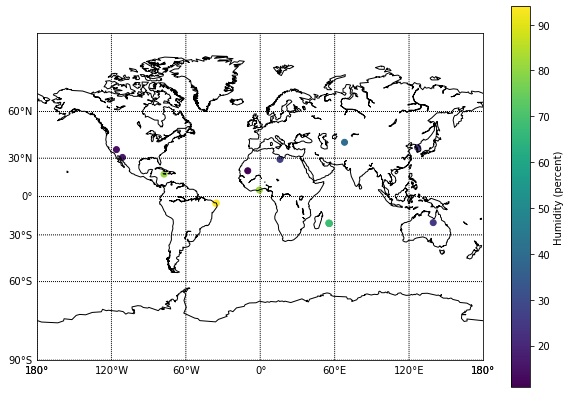

In [49]:
plt.subplots(figsize=(10, 7))
map = Basemap(projection='mill',lon_0=0)


map.drawcoastlines()

#draw parallels = latitude, long
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

map.scatter(clean_city_data['Longitude'], clean_city_data['Latitude'], latlon=True, 
            c=clean_city_data['Humidity'])

plt.colorbar(label=r'Humidity (percent)')

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [ ]:
#store into variable 

In [ ]:
#add a "Hotel Name" column to the DataFrame

In [ ]:
#set parameters to search for hotels with 5000 meters

In [ ]:
#Hit the Google Places API for each city's coordinates

In [ ]:
#Store the first Hotel result into the DataFrame

In [ ]:
#Plot markers on top of the heatmap

In [2]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

NameError: name 'hotel_df' is not defined

In [ ]:
# Add marker layer ontop of heat map
mapfigure = gmaps.figure()
markers = 

# Display figure
mapfigure